In [84]:
#### Data Processing ####
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#### Plot ####
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Bar, Scatter, Figure, Layout, Marker, Box
import colorlover as cl
init_notebook_mode(connected=True)

In [74]:
jan18 = pd.read_csv("sample_data.csv",index_col='Date&Time')
jan18 = jan18.drop('Unnamed: 0', 1)
jan18.index = pd.to_datetime(jan18.index)
jan18['Date'] = jan18.index.date

In [75]:
print(jan18.shape)
jan18.head()

(2976, 26)


,Nucléaire-Global,Charbon-Global,Gaz-Global,Fioul-Global,Pointe-Global,Fioul + Pointe-Global,Hydraulique-Global,Eolien-Global,Solde-Global,Autres-Global,...,Gaz-COG,Gaz-CCG,Gaz-AUT,Hydraulique-FEE,Hydraulique-LAC,Hydraulique-STT,Autres-DEC,Autres-BMA,Autres-BGA,Date
Date&Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,42054,30,2389,251,ND,ND,7986,10624,-2518,1119,...,2081,223,86,5964,1631,391,572,271,277,2018-01-01
2018-01-01 00:15:00,39804,33,2461,330,ND,ND,8377,10323,-983,1136,...,2141,222,95,5982,2094,302,587,282,268,2018-01-01
2018-01-01 00:30:00,37553,35,2533,408,ND,ND,8768,10022,553,1152,...,2201,221,103,5999,2557,212,602,293,258,2018-01-01
2018-01-01 00:45:00,36634,35,2535,408,ND,ND,8623,10021,572,1151,...,2203,221,102,5960,2460,203,602,291,258,2018-01-01
2018-01-01 01:00:00,35714,35,2537,407,ND,ND,8478,10020,591,1151,...,2206,221,102,5921,2363,194,603,290,258,2018-01-01


In [78]:
jan18daily = jan18.groupby(jan18['Date']).mean()
jan18daily.head()

,Nucléaire-Global,Charbon-Global,Gaz-Global,Fioul-Global,Hydraulique-Global,Eolien-Global,Solde-Global,Autres-Global,Pompage-Global,Solaire-Global,...,Gaz-TAC,Gaz-COG,Gaz-CCG,Gaz-AUT,Hydraulique-FEE,Hydraulique-LAC,Hydraulique-STT,Autres-DEC,Autres-BMA,Autres-BGA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,39196.125000,33.833333,2553.968750,403.416667,7666.281250,9160.656250,-2737.812500,1113.479167,-1743.427083,319.197917,...,7.895833,2222.083333,218.604167,105.156250,5785.645833,1645.166667,235.645833,577.166667,288.552083,247.812500
2018-01-02,52547.520833,34.656250,3147.166667,403.645833,8832.687500,6805.052083,-9253.302083,1090.937500,-794.312500,242.979167,...,8.291667,2425.750000,615.750000,97.104167,6178.333333,1781.729167,872.760417,557.635417,286.875000,246.395833
2018-01-03,52593.322917,34.083333,2615.947917,408.614583,8805.750000,9287.541667,-10307.333333,1077.125000,-1282.791667,253.250000,...,8.583333,2344.458333,180.968750,82.020833,6419.885417,1865.312500,520.572917,537.854167,293.906250,245.312500
2018-01-04,52784.437500,35.739583,2700.708333,405.541667,9312.968750,8463.020833,-11148.718750,1125.531250,-1043.687500,260.875000,...,8.687500,2421.625000,186.000000,84.583333,6421.510417,2204.343750,687.312500,568.916667,295.291667,261.375000
2018-01-05,53475.479167,34.531250,3280.500000,403.489583,9359.447917,5094.500000,-9795.083333,1108.437500,-929.937500,381.166667,...,8.572917,2497.947917,677.218750,96.812500,5879.427083,2492.239583,987.885417,568.885417,278.875000,260.666667


In [81]:
cols = ['Fioul-Global','Charbon-Global','Gaz-Global','Hydraulique-Global','Nucléaire-Global','Solaire-Global','Eolien-Global','Autres-Global','Pompage-Global','Solde-Global']

jan18daily = jan18daily[cols]
jan18daily.head()

,Fioul-Global,Charbon-Global,Gaz-Global,Hydraulique-Global,Nucléaire-Global,Solaire-Global,Eolien-Global,Autres-Global,Pompage-Global,Solde-Global
Date,,,,,,,,,,
2018-01-01,403.416667,33.833333,2553.968750,7666.281250,39196.125000,319.197917,9160.656250,1113.479167,-1743.427083,-2737.812500
2018-01-02,403.645833,34.656250,3147.166667,8832.687500,52547.520833,242.979167,6805.052083,1090.937500,-794.312500,-9253.302083
2018-01-03,408.614583,34.083333,2615.947917,8805.750000,52593.322917,253.250000,9287.541667,1077.125000,-1282.791667,-10307.333333
2018-01-04,405.541667,35.739583,2700.708333,9312.968750,52784.437500,260.875000,8463.020833,1125.531250,-1043.687500,-11148.718750
2018-01-05,403.489583,34.531250,3280.500000,9359.447917,53475.479167,381.166667,5094.500000,1108.437500,-929.937500,-9795.083333


[5.88901615e-01 2.77638560e-01 7.23263252e-02 4.42454552e-02
 1.17245930e-02 2.44078591e-03 2.29391280e-03 4.16380585e-04
 1.21425393e-05 2.28844385e-07]


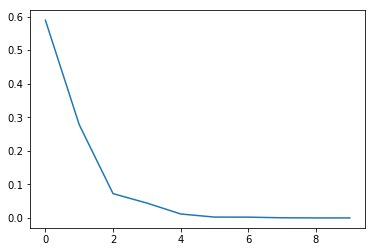

In [85]:
pca = PCA(n_components=10)
pca.fit(jan18daily)
print(pca.explained_variance_ratio_)  

plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()

In [86]:
pca = PCA(n_components=2)
pca.fit(jan18daily)

Xpca = pca.fit_transform(jan18daily)

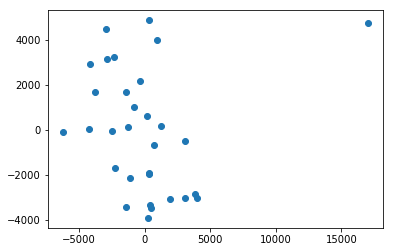

In [98]:
data_pca = pd.DataFrame(Xpca[:,0:2], columns=['X0','X1'])
data_pca['Date'] = jan18daily.index

plt.scatter(data_pca['X0'] , data_pca['X1'])
plt.show()

In [99]:
#### Plot

iplot({
    'data': [
        Scatter(x=data_pca['X0'] , y=data_pca['X1'],mode='markers'), 
    ],
    'layout': Layout()
}, show_link=False)

In [100]:
data_pca.to_csv('PCA.csv')